In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from density_utils import get_all_densities, get_all_velocities, get_neighbors
from simulation_parser import parse_simulation_files, SimulationInfo
from dataclasses import dataclass
import numpy as np

In [41]:
#params

#equidistant!
save_together = "./sys2-ej2.4-sliding.png"
static_paths = ["../static5.txt", "../static10.txt", "../static15.txt", "../static20.txt", "../static25.txt", "../static30.txt"]
dynamic_paths = ["../dynamic5.txt", "../dynamic10.txt", "../dynamic15.txt", "../dynamic20.txt", "../dynamic25.txt", "../dynamic30.txt"]
colors=['blue', 'teal', 'limegreen', 'orange', 'purple', 'pink']

In [42]:
def flatten(matrix):
  flat_list = []
  for row in matrix:
    flat_list += row
  return flat_list

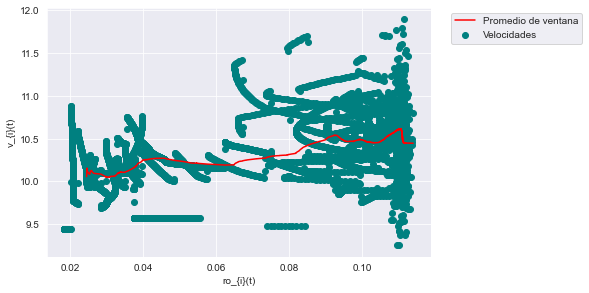

In [44]:
all_ro = []
all_v = []
#have point cloud as background
for i in range(len(static_paths)):
  simInfo = parse_simulation_files(static_paths[i], dynamic_paths[i])
  neighborData = get_neighbors(simInfo)

  densities = get_all_densities(simInfo, neighborData)
  velocities = get_all_velocities(simInfo)
  #plot everything at once (no sliding window average)
  
  y = np.array(velocities[i])
  x = np.array(densities[i])

  all_v.append(velocities[i])
  all_ro.append(densities[i])


velocities = flatten(all_v)
densities = flatten(all_ro)


v = np.array(velocities) 
ro = np.array(densities)
aux = []
for i in range(len(ro)):
  aux.append((ro[i], v[i]))
aux.sort(key=lambda p:p[0], reverse=False)

window_size = 1000
sliding_avg = np.convolve([item[1] for item in aux], np.ones(window_size)/window_size, mode='valid')
x = [item[0] for item in aux]
plt.plot(x[window_size-1:], sliding_avg, label='Promedio de ventana', color='red')
plt.scatter(x, [item[1] for item in aux], marker='o', label='Velocidades', color='teal')

sns.set_style("darkgrid")
plt.tight_layout()
plt.ylabel('v_{i}(t)')
plt.xlabel('ro_{i}(t)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
#plt.show
plt.savefig(save_together, bbox_inches='tight', dpi=1200)

